In [117]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Users/amahfouz/Downloads/SharedFiles/Flight data variables/SampleData__S76D1_20220210T204559_20220210T205932.pof.csv', low_memory=False)


In [10]:
for c in df.columns:
    print(c)
    df[c] = pd.to_numeric(df[c], errors='coerce')


Unnamed: 0
_id
flightId
mask
airDataComputer_hasAdc1ValidCopilot
airDataComputer_hasAdc1ValidPilot
airDataComputer_hasAdc2ValidCopilot
airDataComputer_hasAdc2ValidPilot
airframe_grossWeight
airframe_hasCabinHeaterEnabled
airframe_hasCargoHookLoad
airframe_hasContactWithTakeOffPad
airframe_hasFloatsDeployed
airframe_hasFloatsSwitchEnabled
airframe_hasLandingGearDown
airframe_hasLg1Down
airframe_hasLg2Down
airframe_hasLg3Down
airframe_hasLg4Down
airframe_hasWeightOnWheels
airframe_hasWheelWellFire
alerts_hasAHRSFailureCaution
alerts_hasAvionicTorqueMiscompareCaution
alerts_hasBatteryWarning
alerts_hasDCGenerator1Failure
alerts_hasDCGenerator2Failure
alerts_hasElectricDCBusFailureCaution
alerts_hasEngineChipCaution
alerts_hasEngineHotStartCaution
alerts_hasEnhancedGpwsAlert
alerts_hasEssentialBusFailure
alerts_hasFlightDirectorWarning
alerts_hasFuelLowCaution
alerts_hasFuelLowFailureCaution
alerts_hasGeneratorFailureWarning
alerts_hasGpwsAlert
alerts_hasHydraulicSystemWarning
alerts_hasLo

In [11]:
# Choose the target column
target_column = 'flightState_rates_climbOrDescentRate'

# Calculate correlations
correlations = df.corr()[target_column]


In [13]:
# Sort correlations
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations


flightState_rates_climbOrDescentRate    1.000000
verticalspeed_fpm                       1.000000
verticalspeed_mavg1_fpm                 0.955035
verticalspeed_final_fpm                 0.955035
groundspeed_mavg3_kt                    0.864694
                                          ...   
maneuver_HoverMean                           NaN
maneuver_RMean                               NaN
maneuver_LMean                               NaN
maneuver_CWMean                              NaN
maneuver_CCWMean                             NaN
Name: flightState_rates_climbOrDescentRate, Length: 468, dtype: float64

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
file_path = '/Users/amahfouz/Downloads/csv_data/2023_01_26/2023_01_26_all.csv'
df = pd.read_csv(file_path)
df.head()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/959027934.py:7: DtypeWarning: Columns (3,145,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
0,0.028,01/26/2023,16:10:42.914,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047,01/26/2023,16:10:42.933,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071,01/26/2023,16:10:42.957,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.096,01/26/2023,16:10:42.982,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.119,01/26/2023,16:10:43.005,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# remove types raw and scenario start and scenario end rows
file_path = '/Users/amahfouz/Downloads/csv_data/2023_01_26/SimData_2023.01.26_16.05.57.csv'
df.drop(0, inplace=True)
df.drop(1, inplace=True)
df = df.drop(df.index[-1])
df.tail(10)

KeyError: '[0] not found in axis'

In [122]:
# Convert 'time' column to datetime object
# from datetime import datetime
df['DateTime'] = df['Date'] + ' '+ df['System UTC Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')
df['Radio Altitude Pilot']

0         0.049
1         0.049
2         0.049
3         0.049
4         0.049
          ...  
691747    0.167
691748    0.167
691749    0.167
691750    0.167
691751    0.167
Name: Radio Altitude Pilot, Length: 691752, dtype: float64

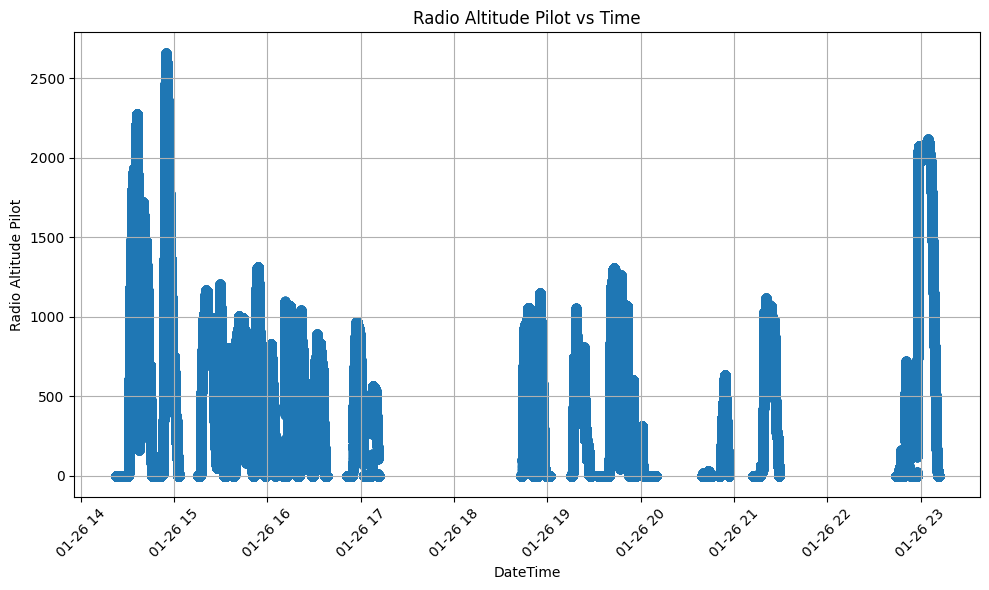

In [50]:
# Plot scatter plot for 'altitude' vs 'time'
plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Radio Altitude Pilot'])
plt.xlabel('DateTime')
plt.ylabel('Radio Altitude Pilot')
plt.title('Radio Altitude Pilot vs Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
df['hour'] = df['DateTime'].dt.hour

# Group the data by hour
grouped = df.groupby('hour')

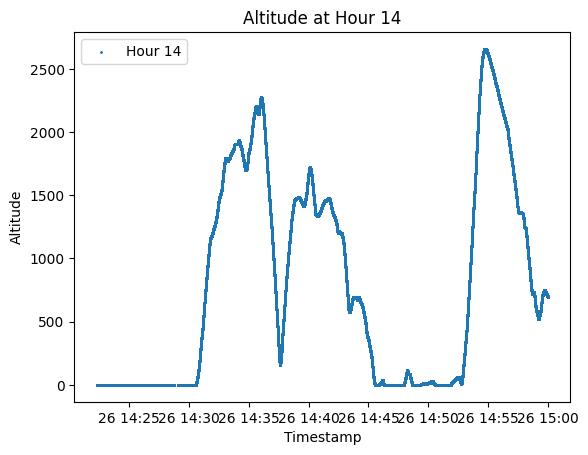

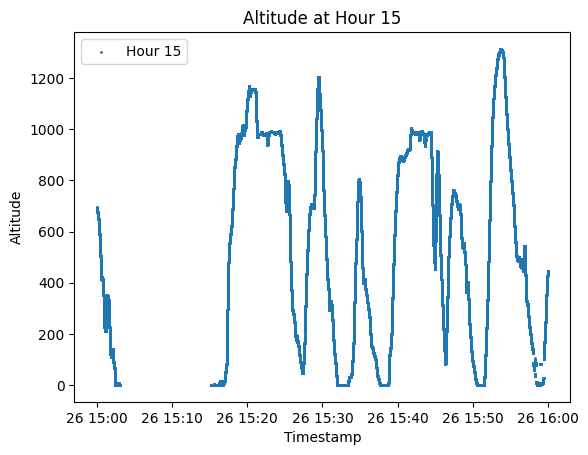

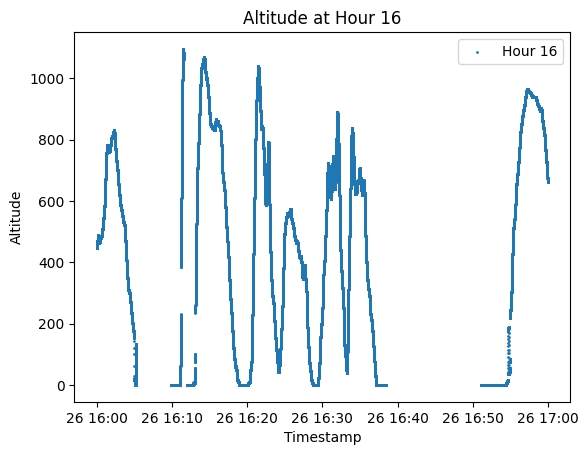

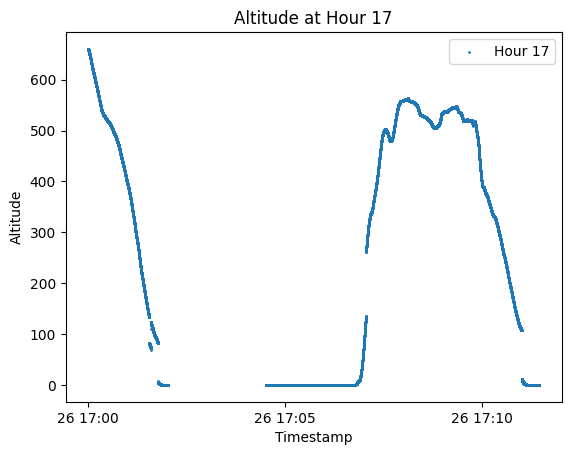

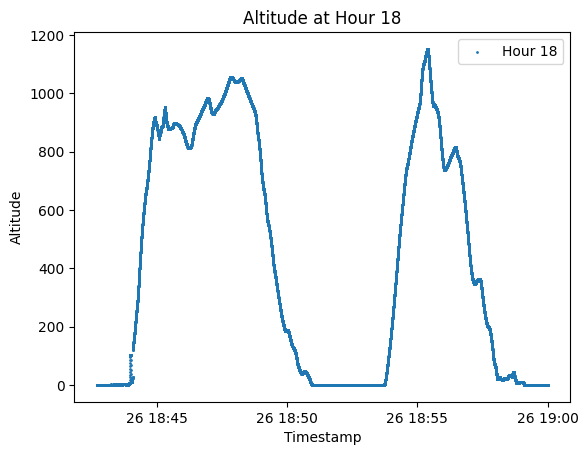

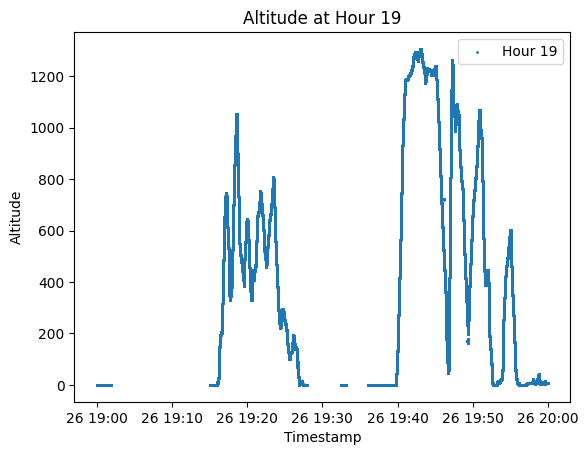

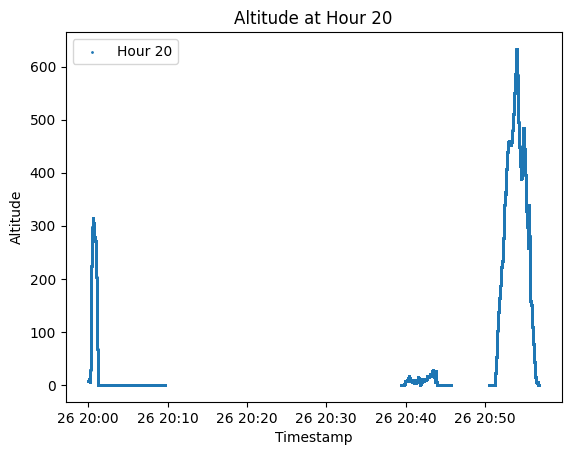

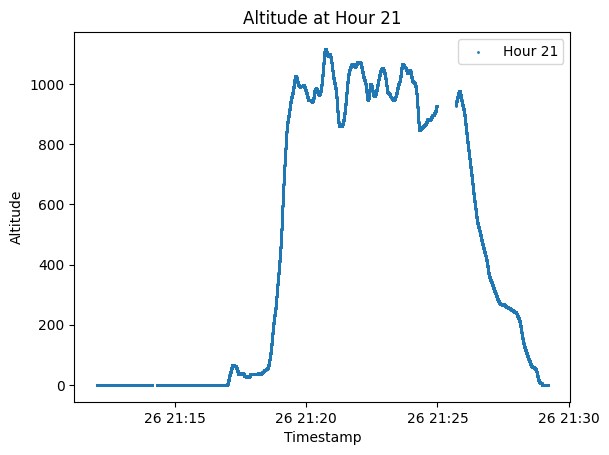

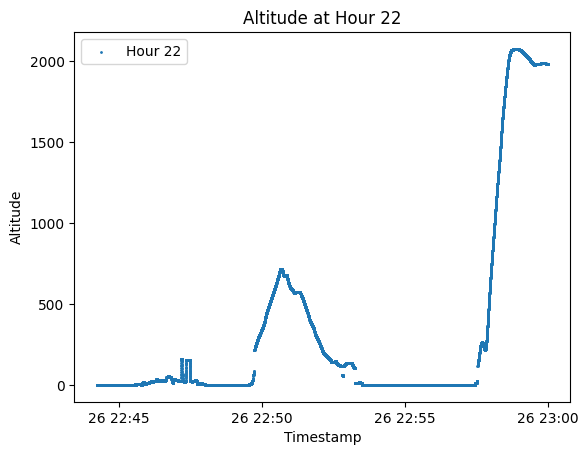

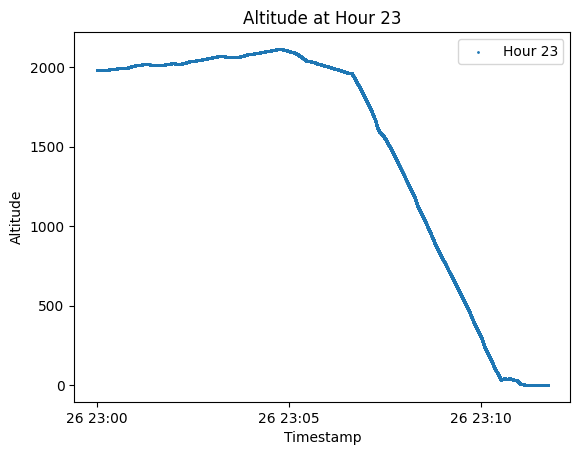

In [87]:
for hour, group in grouped:
    plt.figure()
    plt.scatter(group['DateTime'], group['Radio Altitude Pilot'], label=f'Hour {hour}', s=1)
    plt.xlabel('Timestamp')
    plt.ylabel('Altitude')
    plt.title('Altitude at Hour '+str(hour))
    plt.legend()
    plt.show()


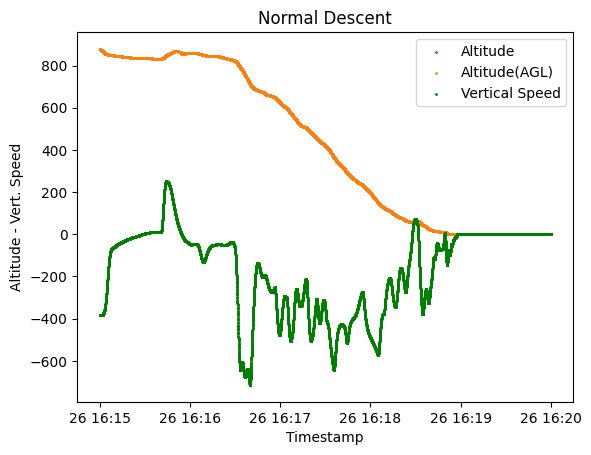

In [113]:
climb_start_time = "01/26/2023 16:15:00.00"
climb_end_time= "01/26/2023 16:20:00.000"

filtered_df = df[(df['DateTime'] >= climb_start_time) & (df['DateTime'] <= climb_end_time)]


plt.figure()
plt.scatter(filtered_df['DateTime'], filtered_df['Radio Altitude Pilot'], label='Altitude', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Vert. Speed'], color='green', label='Vertical Speed', s=1)

plt.xlabel('Timestamp')
plt.ylabel('Altitude - Vert. Speed')
plt.title("Normal Descent")
plt.legend()
plt.show()

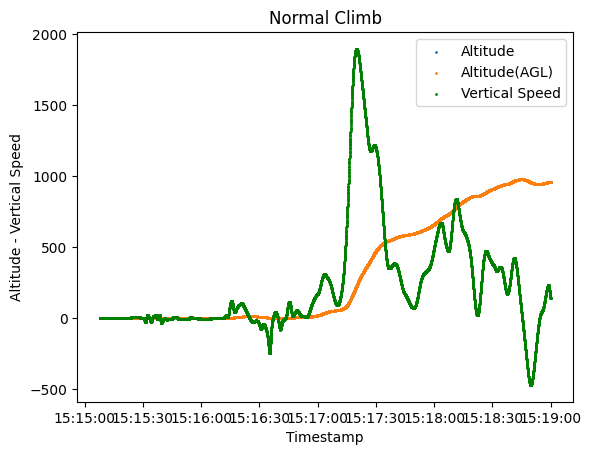

In [114]:
climb_start_time = "01/26/2023 15:15:00.00"
climb_end_time= "01/26/2023 15:19:00.000"

filtered_df = df[(df['DateTime'] >= climb_start_time) & (df['DateTime'] <= climb_end_time)]
plt.figure()

plt.scatter(filtered_df['DateTime'], filtered_df['Radio Altitude Pilot'], label='Altitude', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Vert. Speed'], color='green', label='Vertical Speed', s=1)

plt.xlabel('Timestamp')
plt.ylabel('Altitude - Vertical Speed')
plt.title("Normal Climb")
plt.legend()
plt.show()



In [132]:
from sklearn.cluster import KMeans
string_columns = df.select_dtypes(include=['object']).columns

no_strings_df = df.drop(columns=string_columns).drop(columns=['DateTime']).fillna(0)
no_strings_df.replace([np.inf, -np.inf], 0, inplace=True)
data = no_strings_df.values
no_strings_df.head()

,Elapsed Time,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,Roll,Yaw,Alpha,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
0,0.028,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.096,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.119,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


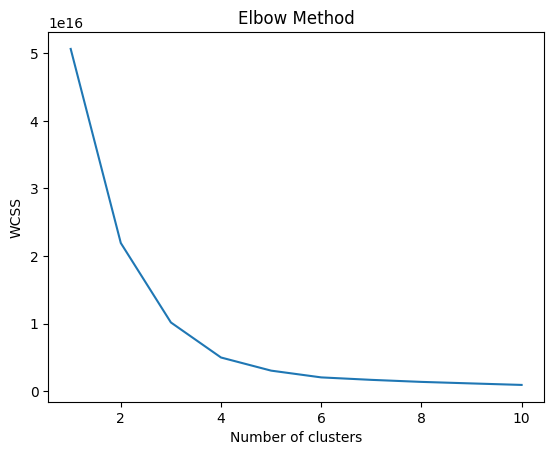

In [133]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

In [145]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

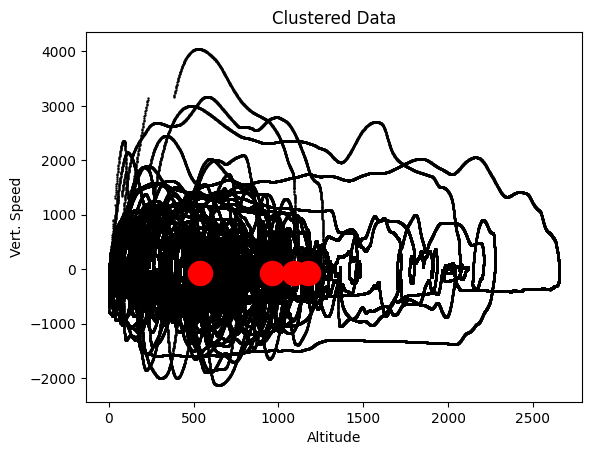

In [163]:
plt.scatter(df["Altitude(AGL)"], df['Vert. Speed'], s=0.5, color='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clustered Data')
plt.xlabel('Altitude')
plt.ylabel('Vert. Speed')
plt.show()

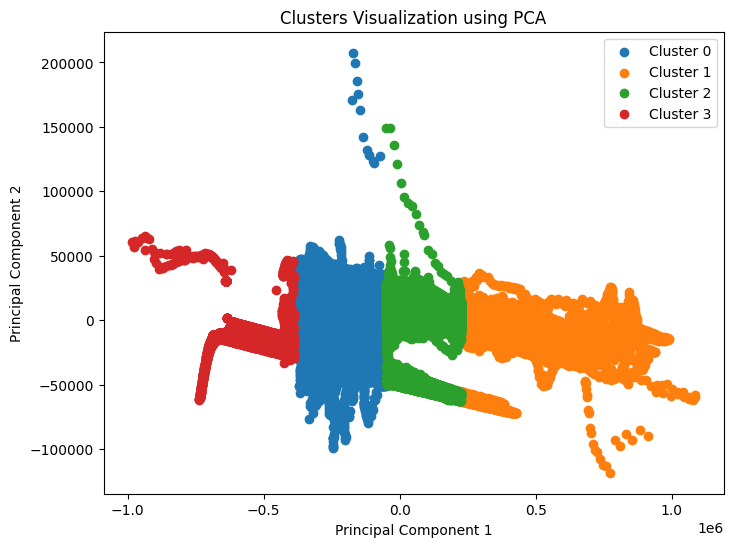

In [146]:
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [147]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a DataFrame with t-SNE results and cluster labels
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = cluster_labels

# Visualize clusters in 2D using t-SNE
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

KeyboardInterrupt: 